In [39]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from torch.utils.data import TensorDataset,DataLoader
from mlxtend.plotting import plot_decision_regions

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


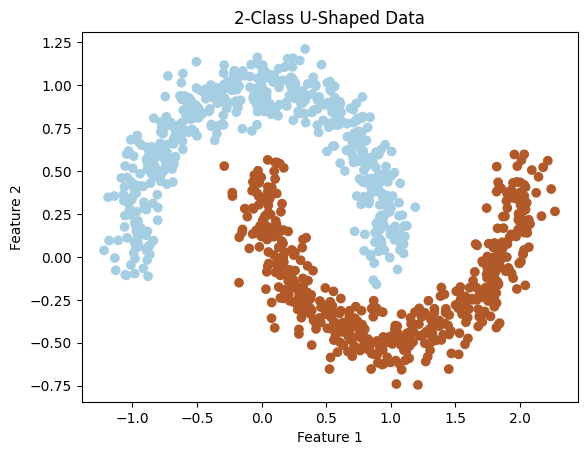

In [28]:
# Generate U-shaped (moon-shaped) data for 2 classes
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Convert the dataset to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# Plot the data with distinct colors for each class
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2-Class U-Shaped Data')
plt.show()


In [29]:
# Creating dataset oject for data loader
dataset = torch.utils.data.TensorDataset(X, y)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

In [30]:
for X,y in data_loader:
  print(y)
  break

tensor([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])


In [31]:
# Define the neural network
class neural_net(nn.Module):
    def __init__(self):
        super(neural_net, self).__init__()
        self.sigmoid_stack = nn.Sequential(
            nn.Linear(2, 10),
            nn.Sigmoid(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.sigmoid_stack(x)

# Create an instance of the neural network
model = neural_net()

# Print the model architecture
print(model)

neural_net(
  (sigmoid_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [32]:
# Defining the training parameters
num_epochs = 10
learning_rate = 0.01

loss_fun = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Defining the functions for training and testing

In [33]:
def train(model, data_loader, loss_fun, optimizer, device):

    # Set the model to training mode
    model.train()

    total_loss = 0  # For tracking the cumulative loss

    for X, y in data_loader:
        X = X.to(device)
        y = y.to(device)

        # Forward pass
        y_pred = model(X)

        # Compute the loss (unsqueeze y to match dimensions for binary classification)
        loss = loss_fun(y_pred, y.unsqueeze(1).float())

        # Backpropagation and optimization
        optimizer.zero_grad()  # Clear gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update weights

        total_loss += loss.item()  # Accumulate loss

    avg_loss = total_loss / len(data_loader)  # Calculate average loss over the epoch
    return avg_loss


In [34]:
# Initialize weights to zero
def init_weights_zero(m):
    if isinstance(m, nn.Linear):
        nn.init.constant_(m.weight, 0)  # Set all weights to 0
        nn.init.constant_(m.bias, 0)    # Set all biases to 0

# Apply the zero-initialization to the model
model.apply(init_weights_zero)

# Print the model to verify
print(model)

# Check the weights and biases of each layer
for name, param in model.named_parameters():
    print(f"{name}:\n{param}\n")

neural_net(
  (sigmoid_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
sigmoid_stack.0.weight:
Parameter containing:
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], requires_grad=True)

sigmoid_stack.0.bias:
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

sigmoid_stack.2.weight:
Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], requires_grad=True)

sigmoid_stack.2.bias:
Parameter containing:
tensor([0.], requires_grad=True)



In [35]:
# Assume data_loader is your DataLoader object
for epoch in range(num_epochs):
    loss = train(model, data_loader, loss_fun, optimizer, device)
    print(f"Epoch {epoch+1}, Loss: {loss}")

Epoch 1, Loss: 0.6932243816554546
Epoch 2, Loss: 0.6932135187089443
Epoch 3, Loss: 0.6932230889797211
Epoch 4, Loss: 0.6932761296629906
Epoch 5, Loss: 0.6932286620140076
Epoch 6, Loss: 0.6932126060128212
Epoch 7, Loss: 0.6932066977024078
Epoch 8, Loss: 0.6931904405355453
Epoch 9, Loss: 0.6931969337165356
Epoch 10, Loss: 0.6932008191943169


In [ ]:
# Check the weights and biases of each layer
for name, param in model.named_parameters():
    print(f"{name}:\n{param}\n")

[array([[-0.4567254 , -0.4567254 , -0.4567254 , -0.4567254 , -0.4567254 ,
         -0.4567254 , -0.4567254 , -0.4567254 , -0.45672542, -0.45672542],
        [ 0.47703952,  0.47703952,  0.47703952,  0.47703952,  0.47703952,
          0.47703952,  0.47703952,  0.47703952,  0.47703955,  0.47703955]],
       dtype=float32),
 array([-0.10217472, -0.10217472, -0.10217472, -0.10217472, -0.10217472,
        -0.10217472, -0.10217472, -0.10217472, -0.10217471, -0.10217471],
       dtype=float32),
 array([[-0.06693693],
        [-0.06693693],
        [-0.06693693],
        [-0.06693693],
        [-0.06693693],
        [-0.06693693],
        [-0.06693693],
        [-0.06693693],
        [-0.06693694],
        [-0.06693694]], dtype=float32),
 array([0.07306698], dtype=float32)]